# Course Project - Solar PV in Germany

*Name*: Andreas Eckmann

*E-Mail*: eckmanna@ethz.ch

In [32]:
from IPython.display import display
import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700
from pprint import pprint

import time
import datetime
import os
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import sklearn

In [33]:
# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

In [34]:
# Get path to load the file from my computer (local)
parent_path = os.path.dirname(os.getcwd()) # os.getcwd() fetchs the current path, 
data_path = os.path.join(parent_path, 'course_project\data')
print(data_path)

C:\Users\Andi Eckmann\Desktop\ETH Studium\MASTERSTUDIUM\2. Semester\Big Data for Public Policy\big_data_policy_2020\course_project\data


In [35]:
df1 = pd.read_excel(data_path +'/Cumm_and_ann_installed_cap_nach_bundesland.xlsx') #avoiding "unnamed"-row

print(df1.shape,
      df1.head())

(487, 15)    Jahr     ENH_Bundesland  Installed_Cap  cum_installed_cap  pv_cost  \
0  1990  Baden-Württemberg         28.959             28.959      NaN   
1  1990             Bayern        110.740            110.740      NaN   
2  1990             Berlin         14.180             14.180      NaN   
3  1990            Hamburg         10.990             10.990      NaN   
4  1990      Niedersachsen         13.720             13.720      NaN   

   module_cost  feed-in  population   area  GDP  Installed_Cap_pa  \
0         10.0      0.0   9822027.0  35748  NaN          0.000810   
1         10.0      0.0  11448823.0  70542  NaN          0.001570   
2         10.0      0.0   3433695.0    891  NaN          0.015915   
3         10.0      0.0   1652363.0    755  NaN          0.014556   
4         10.0      0.0   7387245.0  47710  NaN          0.000288   

   cum_installed_cap_pa  Installed_Cap_pc  cum_installed_cap_pc  GDP_pc  
0              0.000810          0.000003              0.00000

In [36]:
# Or load the csv data from my online repository
"""
df1 = pd.read_csv('https://raw.githubusercontent.com/eckmanna/big_data_policy_2020/master/data/X_num_y_merged.csv').iloc[:, 1:] #avoiding "unnamed"-row

print(df1.shape,
      df1.head())
"""

'\ndf1 = pd.read_csv(\'https://raw.githubusercontent.com/eckmanna/big_data_policy_2020/master/data/X_num_y_merged.csv\').iloc[:, 1:] #avoiding "unnamed"-row\n\nprint(df1.shape,\n      df1.head())\n'

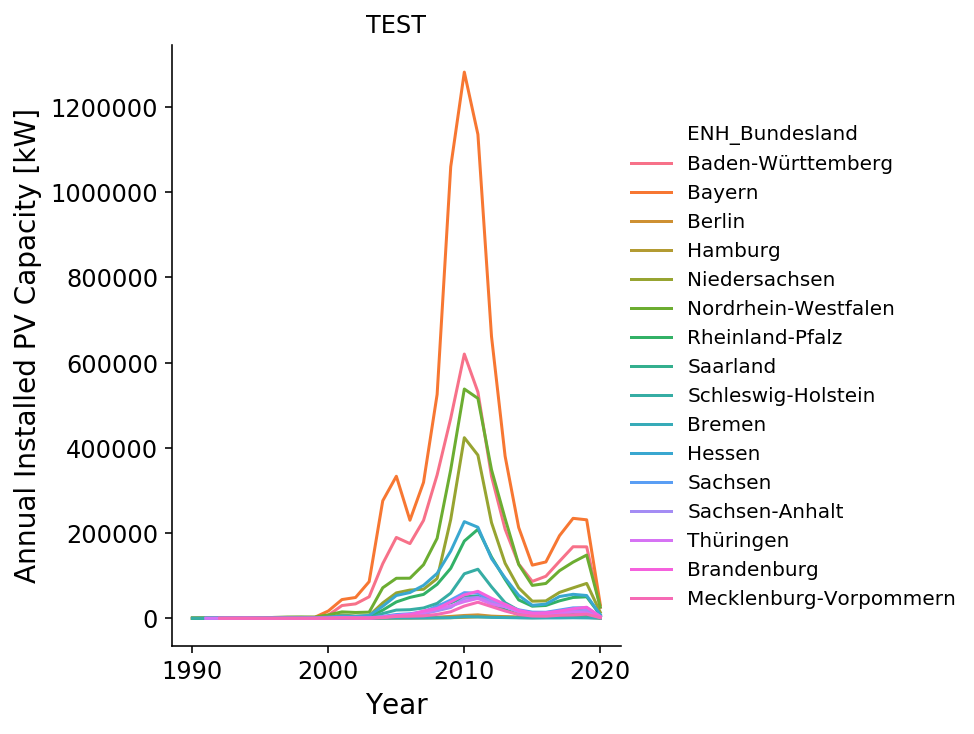

In [37]:
p1 = sns.relplot(x="Jahr", y="Installed_Cap", hue="ENH_Bundesland", kind="line", data=df1)
p1.set(xlabel="Year",
       ylabel="Annual Installed PV Capacity [kW]",
       title="TEST")

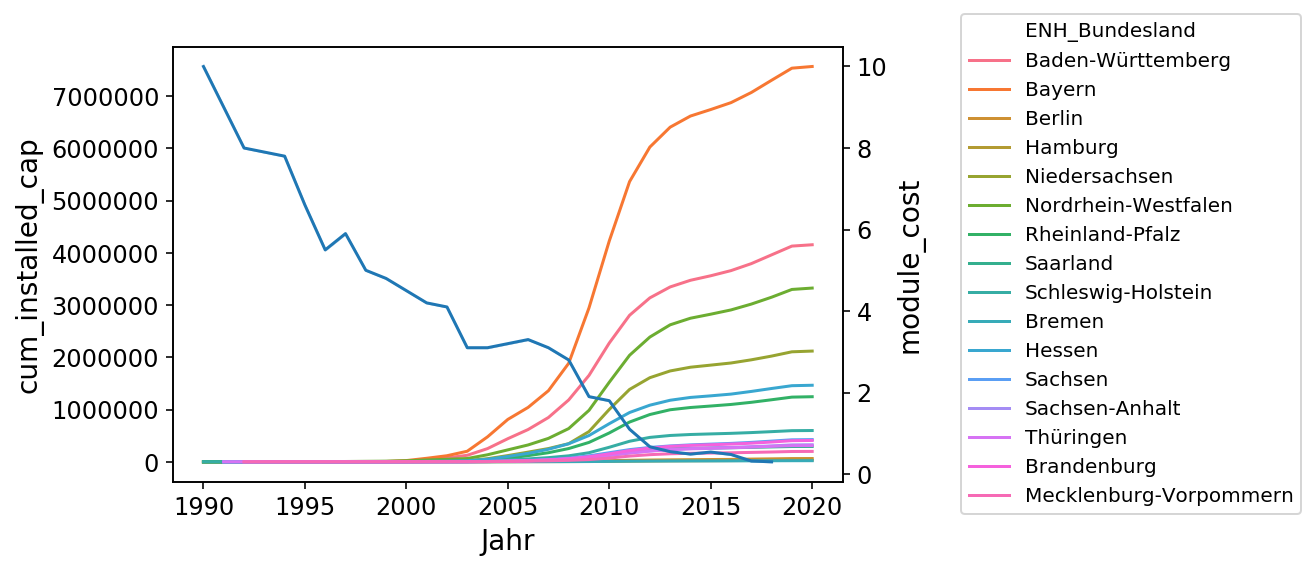

In [38]:
p2 = sns.lineplot(x = "Jahr", y="cum_installed_cap", hue="ENH_Bundesland", data=df1)
ax2 = plt.twinx()
sns.lineplot(x = "Jahr", y="module_cost", data = df1, ax = ax2) 
p2.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
plt.show()

### Split train test sets 
do a separate temporal split where the training set is the first 80% of days in the time series

In [39]:
len(df1.cum_installed_cap)

487

In [40]:
df1.head()

,Jahr,ENH_Bundesland,Installed_Cap,cum_installed_cap,pv_cost,module_cost,feed-in,population,area,GDP,Installed_Cap_pa,cum_installed_cap_pa,Installed_Cap_pc,cum_installed_cap_pc,GDP_pc
0,1990,Baden-Württemberg,28.959,28.959,NaN,10.0,0.0,9822027.0,35748,NaN,0.000810,0.000810,0.000003,0.000003,0.0
1,1990,Bayern,110.740,110.740,NaN,10.0,0.0,11448823.0,70542,NaN,0.001570,0.001570,0.000010,0.000010,0.0
2,1990,Berlin,14.180,14.180,NaN,10.0,0.0,3433695.0,891,NaN,0.015915,0.015915,0.000004,0.000004,0.0
3,1990,Hamburg,10.990,10.990,NaN,10.0,0.0,1652363.0,755,NaN,0.014556,0.014556,0.000007,0.000007,0.0
4,1990,Niedersachsen,13.720,13.720,NaN,10.0,0.0,7387245.0,47710,NaN,0.000288,0.000288,0.000002,0.000002,0.0


In [69]:
df2 = df1.groupby('ENH_Bundesland') 
df2.head()

,Jahr,ENH_Bundesland,Installed_Cap,cum_installed_cap,pv_cost,module_cost,feed-in,population,area,GDP,Installed_Cap_pa,cum_installed_cap_pa,Installed_Cap_pc,cum_installed_cap_pc,GDP_pc
0,1990,Baden-Württemberg,28.959,28.959,NaN,10.0,0.0000,9822027.0,35748,NaN,0.000810,0.000810,2.948373e-06,2.948373e-06,0.000000
1,1990,Bayern,110.740,110.740,NaN,10.0,0.0000,11448823.0,70542,NaN,0.001570,0.001570,9.672610e-06,9.672610e-06,0.000000
2,1990,Berlin,14.180,14.180,NaN,10.0,0.0000,3433695.0,891,NaN,0.015915,0.015915,4.129662e-06,4.129662e-06,0.000000
3,1990,Hamburg,10.990,10.990,NaN,10.0,0.0000,1652363.0,755,NaN,0.014556,0.014556,6.651081e-06,6.651081e-06,0.000000
4,1990,Niedersachsen,13.720,13.720,NaN,10.0,0.0000,7387245.0,47710,NaN,0.000288,0.000288,1.857255e-06,1.857255e-06,0.000000
5,1990,Nordrhein-Westfalen,11.930,11.930,NaN,10.0,0.0000,17349651.0,34112,NaN,0.000350,0.000350,6.876219e-07,6.876219e-07,0.000000
6,1990,Rheinland-Pfalz,15.900,15.900,NaN,10.0,0.0000,3763510.0,19858,NaN,0.000801,0.000801,4.224780e-06,4.224780e-06,0.000000
7,1990,Saarland,13.655,13.655,NaN,10.0,0.0000,1072963.0,2571,NaN,0.005311,0.005311,1.272644e-05,1.272644e-05,0.000000
8,1990,Schleswig-Holstein,5.800,5.800,NaN,10.0,0.0000,2626127.0,15804,NaN,0.000367,0.000367,2.208576e-06,2.208576e-06,0.000000
9,1991,Baden-Württemberg,53.420,82.379,NaN,9.0,8.4711,10001840.0,35748,242884.0,0.001494,0.002304,5.341017e-06,8.236385e-06,0.024284


In [65]:
all_laender = list(df1['ENH_Bundesland'])
#all_laender

In [ ]:
#loop over hashtags and texts
for i in all_laender:
    laender = []
    for j in i:
        if j in hashtag_search_strings:
            hashs.append(j)
    hash_occ.append(hashs)
        
text_occ = []
for i in texts:
    tex = []
    for j in i:
        if j in text_search_strings:
            tex.append(j)
    text_occ.append(tex)

In [ ]:
for i in df1:
    land = []
    for land in i.split()
    df_[i]
    
    
    df1.loc[(df1.ENH_Bundesland == "JFK")]

In [ ]:
# obtain bundesländer as list
all_laender = list(df1['ENH_Bundesland'])

# search for hashtags and remove special characters
# and separate each word in the tweets --> important for keyword search afterwards
ats = []
hashtags = []
texts = []
for i in all_texts:
    a = []
    tex = []
    hashs = []
    for word in i.split():
        hashtag = re.search(r'(?<=#)\w+', word)
        at = re.search(r'(?<=@)\w+', word)
        if hashtag != None:
            hashs.append(hashtag.group().lower())
        if at != None:
            a.append(at.group().lower())
        else:
            text = re.search(r'\w+', word)
            if text != None:
                tex.append(text.group().lower())
    ats.append(a)
    texts.append(tex)
    hashtags.append(hashs)

In [43]:
# from datafram to array (w/d "Date" column)
X_full = df1[['module_cost','feed-in','GDP_pc']].to_numpy()
X_full.shape

(487, 3)

In [44]:
# from datafram to array
Y_full = df1['Installed_Cap'].to_numpy()
Y_full.shape

(487,)

In [45]:
X_df=pd.DataFrame(X_full, columns=['module_cost','feed-in','GDP_pc'])
X_df.head()

,module_cost,feed-in,GDP_pc
0,10.0,0.0,0.0
1,10.0,0.0,0.0
2,10.0,0.0,0.0
3,10.0,0.0,0.0
4,10.0,0.0,0.0


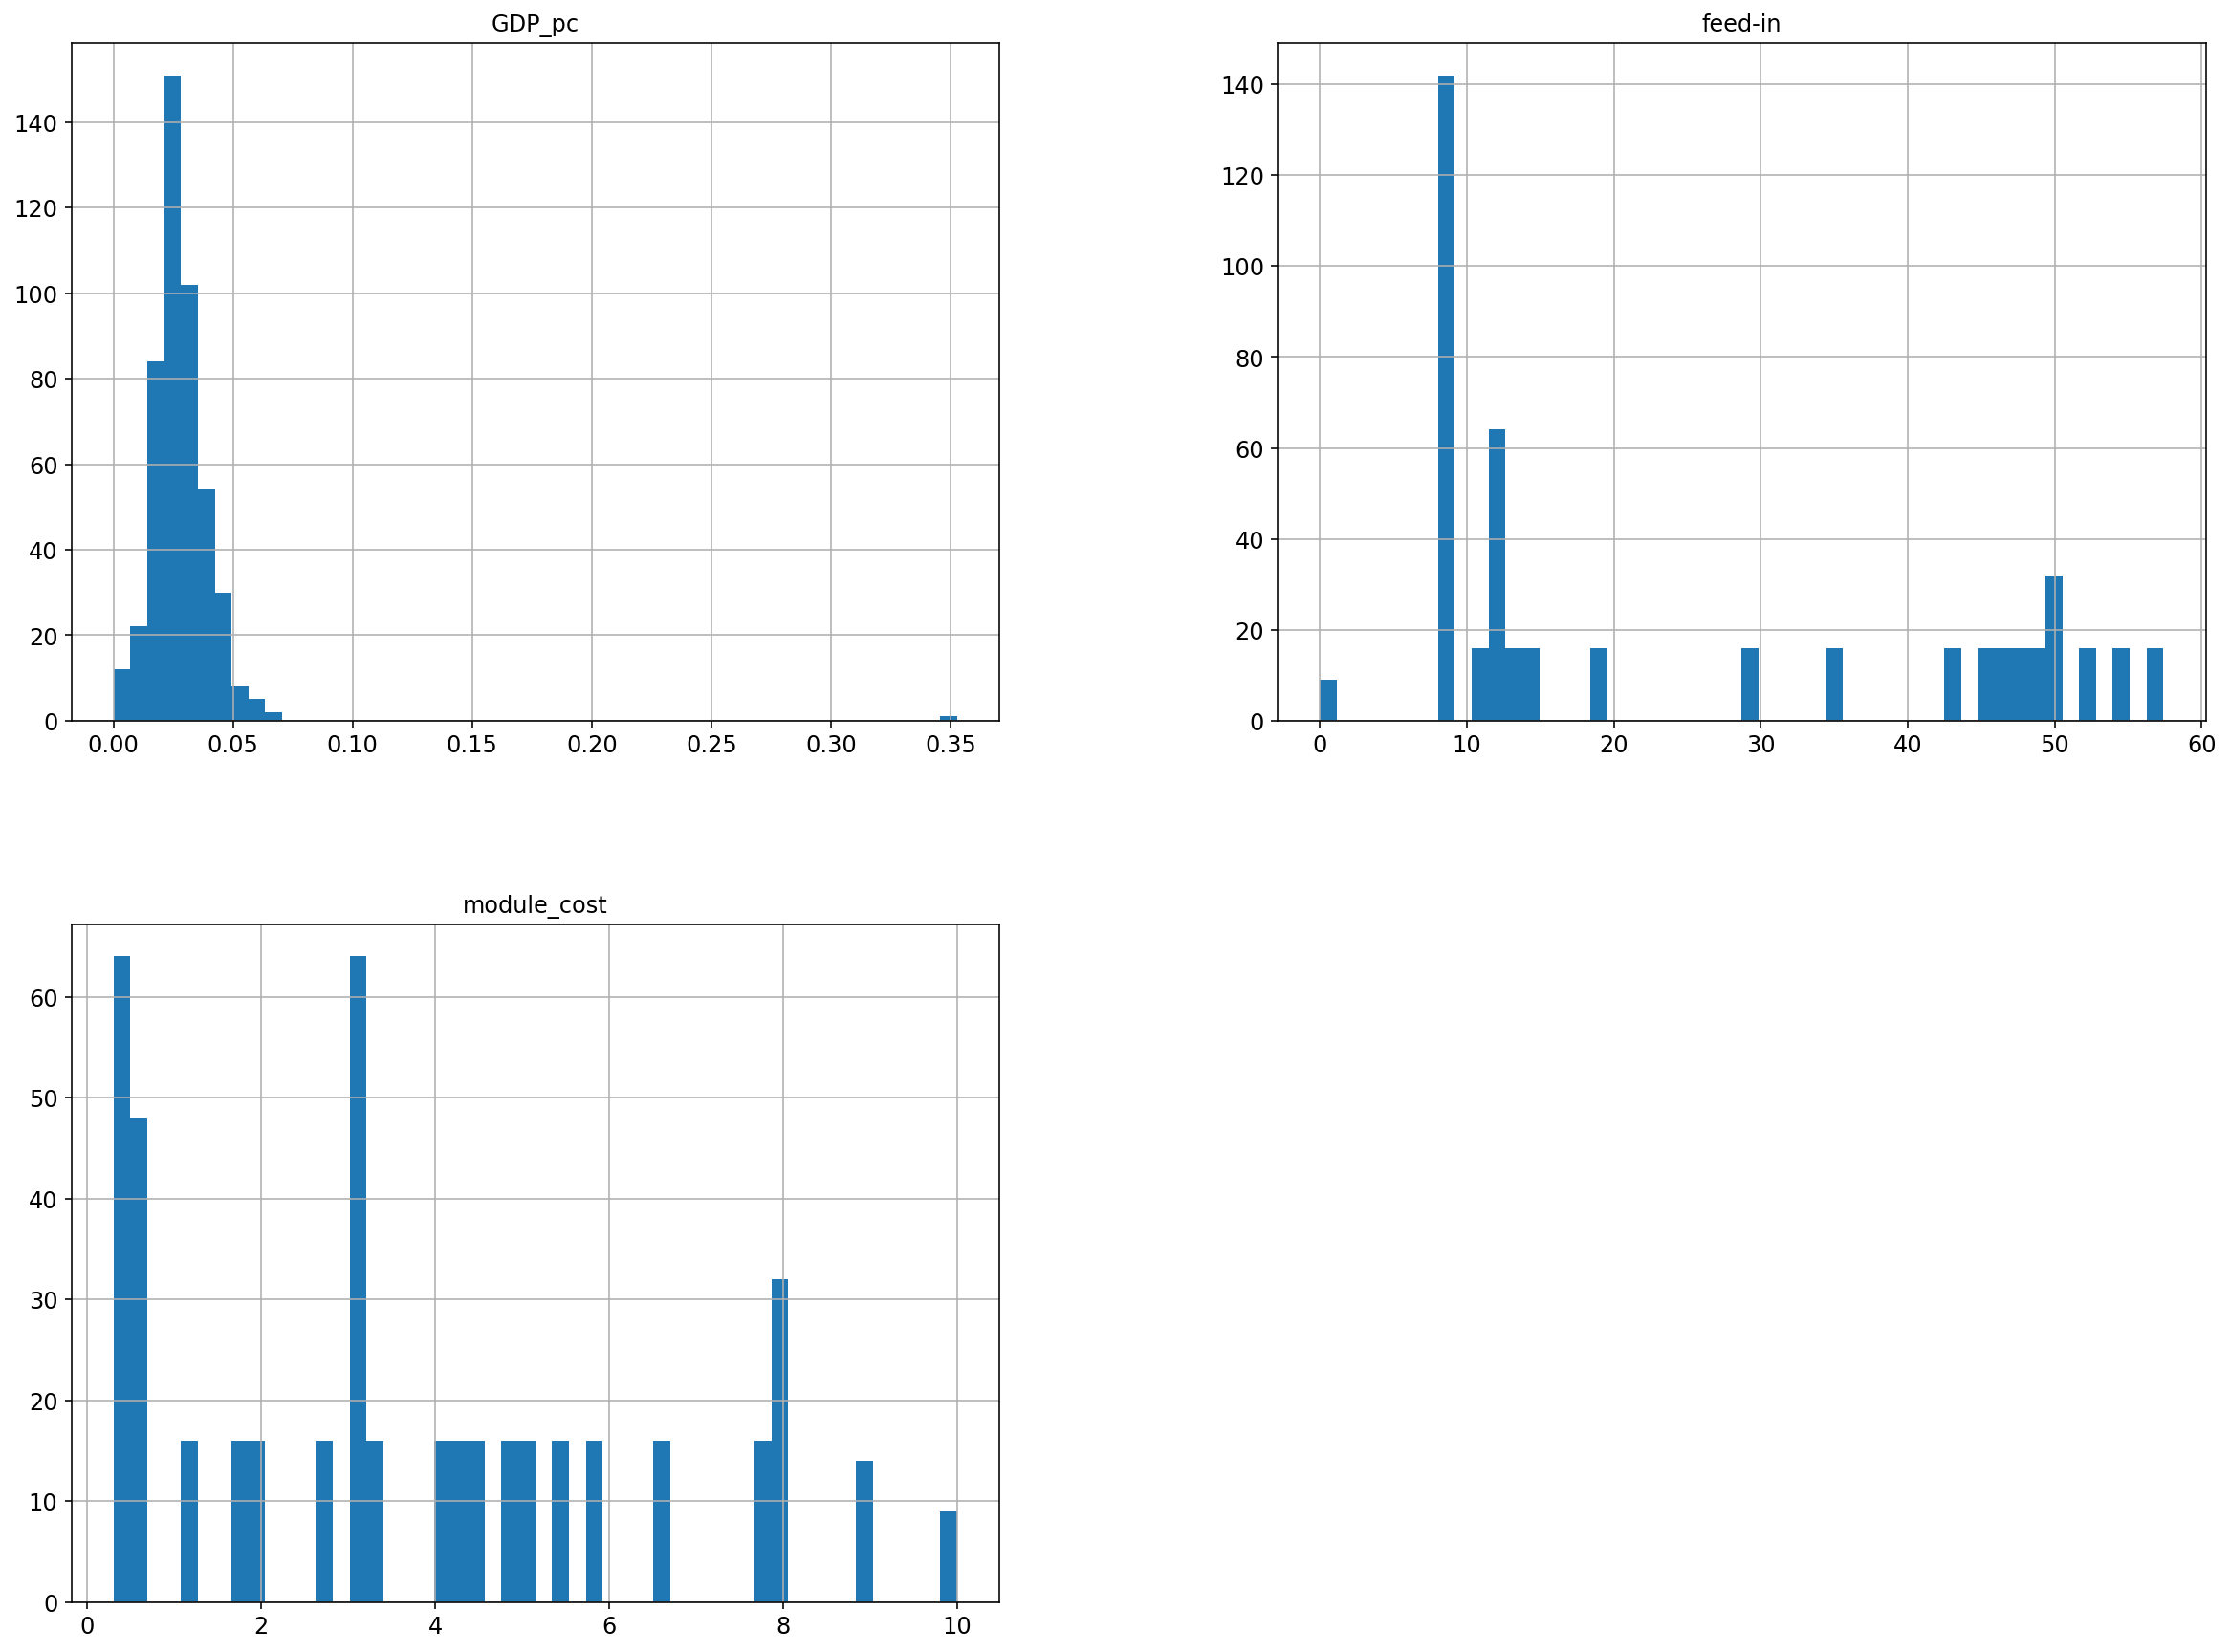

In [46]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

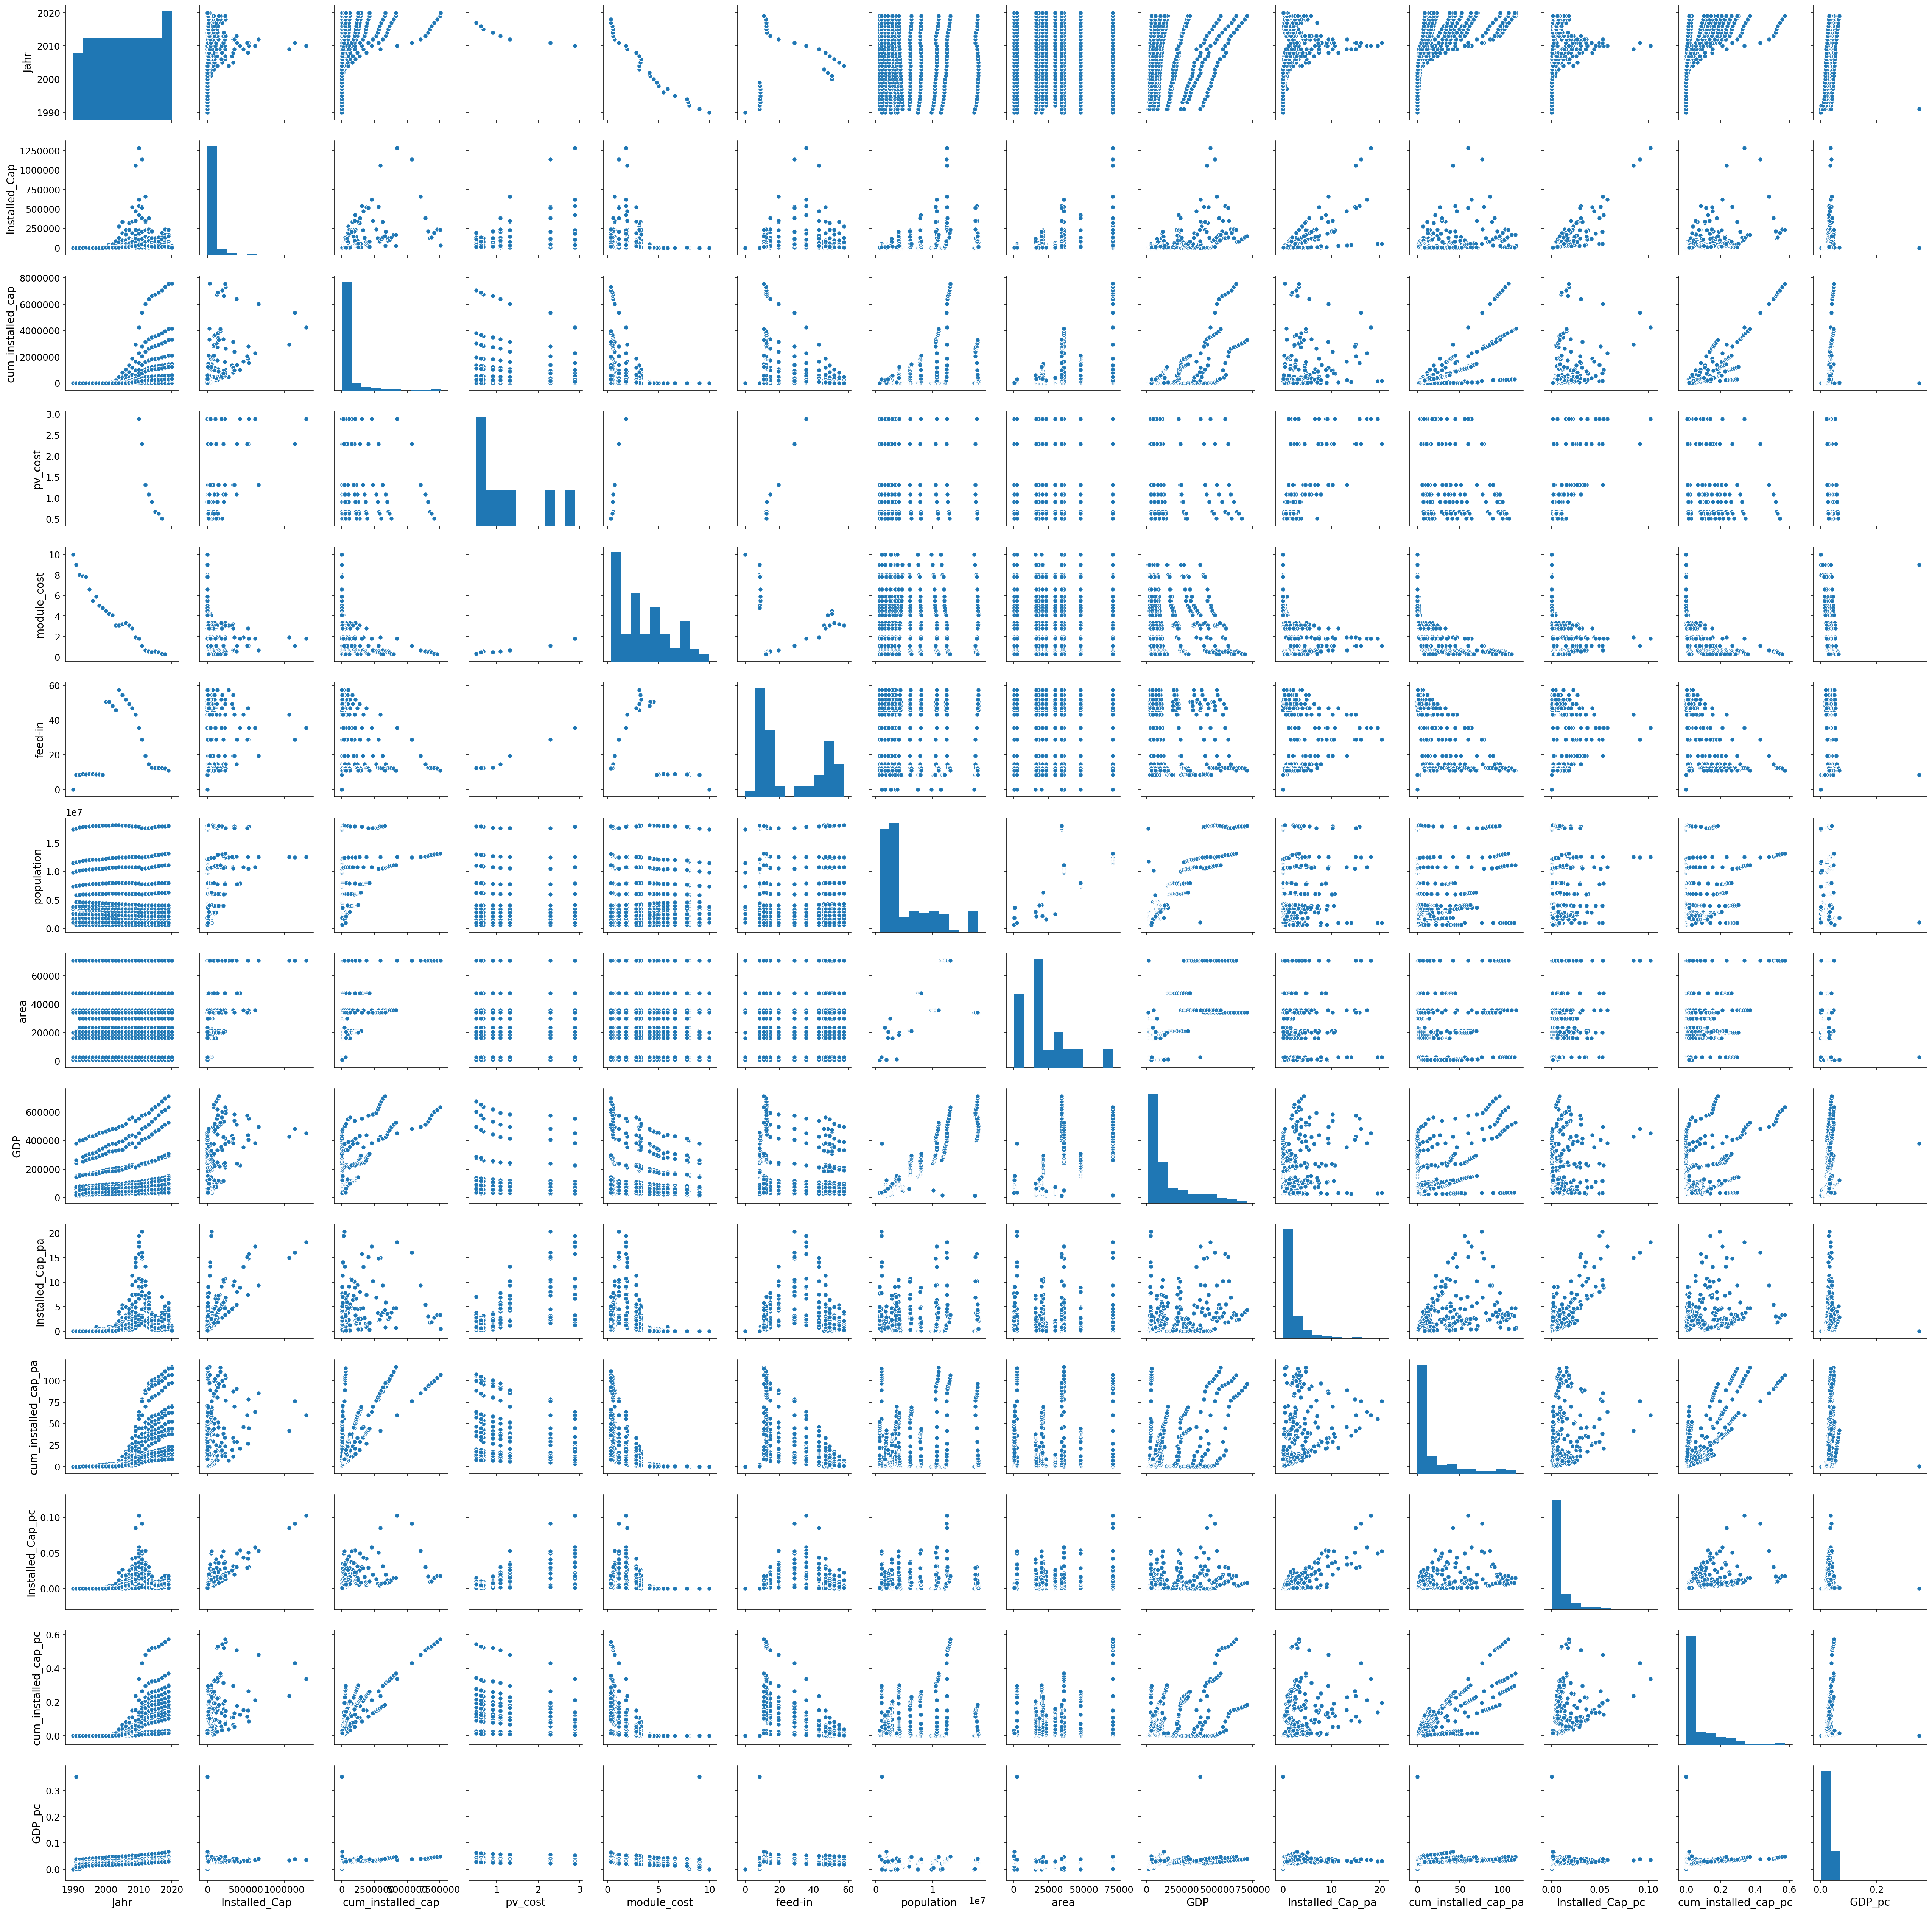

In [47]:
sns.pairplot(df1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.2)

In [61]:
print("train data", X_train.shape, Y_train.shape)
print("test data", X_test.shape,  Y_test.shape)

train data (389, 3) (389,)
test data (98, 3) (98,)


In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [54]:
# randomized splitting
# use non-standardized data for randomized splitting:
lin_reg.fit(X_train, Y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, Y_train), 2)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
# randomized splitting
# use standardized data for randomized splitting: 
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

NameError: name 'X_train_scaled' is not defined

In [56]:
features = list(X_df.columns)

print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [57]:
from sklearn.metrics import mean_squared_error
# randomized splitting
# in-sample performance (train data)
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMS: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
# randomized splitting
# out-of-sample performance (test data)
y_test_pred = lin_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [59]:
# Regplot
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([50, 225], [50, 225], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

NameError: name 'y_test_pred' is not defined

In [23]:
smp_size = floor(0.80 * length (unique (df1$Jahr)))
iris %>% filter(Species %in% sample(levels(Species),smp_size))

SyntaxError: invalid syntax (<ipython-input-23-80f41b133f65>, line 1)

In [24]:
X = df1["Jahr"]
Y = df1["cum_installed_cap"]

In [25]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]

IndentationError: expected an indented block (<ipython-input-25-0f87cbc375a5>, line 6)

In [26]:
# create benchmark
bench = int(len(Y_full)*0.8) # 80% of the data

# for the Y_full variable
y_train = Y_full[:bench]
y_test = Y_full[bench:]

# for the X_full variable
X_train = X_full[:bench]
X_test = X_full[bench:]

print("temporal train data", X_train.shape, y_train.shape)
print("temporal test data", X_test.shape,  y_test.shape)


NameError: name 'Y_full' is not defined